In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_csv('Newest_amazon_data.csv')

In [3]:
df2.head()

,category,title,author,publication_date,rating,number_of_ratings
0,Arts & Photography,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,2015-01-01,4.8,27397
1,Arts & Photography,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondo,2014-10-14,4.5,23167
2,Arts & Photography,Born a Crime: Stories from a South African Chi...,Trevor Noah,2019-02-12,4.8,20444
3,Arts & Photography,Born a Crime: Stories from a South African Chi...,Trevor Noah,2016-11-15,4.8,20444
4,Arts & Photography,Proof of Heaven: A Neurosurgeon's Journey into...,Eben Alexander,2012-10-23,4.3,13695


In [4]:
df2.shape

(1536, 6)

In [5]:
df2.describe()

,rating,number_of_ratings
count,1462.000000,1536.000000
mean,4.654788,11078.149089
std,0.147768,9649.796134
min,4.300000,821.000000
25%,4.600000,4603.500000
50%,4.700000,8724.000000
75%,4.800000,14107.000000
max,4.900000,96513.000000


In [6]:
df2.dtypes

category              object
title                 object
author                object
publication_date      object
rating               float64
number_of_ratings      int64
dtype: object

In [7]:
from datetime import datetime
df2['publication_date']= df2['publication_date'].astype('datetime64[ns]')

In [8]:
df2.dtypes

category                     object
title                        object
author                       object
publication_date     datetime64[ns]
rating                      float64
number_of_ratings             int64
dtype: object

In [9]:
df2.head()

,category,title,author,publication_date,rating,number_of_ratings
0,Arts & Photography,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,2015-01-01,4.8,27397
1,Arts & Photography,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondo,2014-10-14,4.5,23167
2,Arts & Photography,Born a Crime: Stories from a South African Chi...,Trevor Noah,2019-02-12,4.8,20444
3,Arts & Photography,Born a Crime: Stories from a South African Chi...,Trevor Noah,2016-11-15,4.8,20444
4,Arts & Photography,Proof of Heaven: A Neurosurgeon's Journey into...,Eben Alexander,2012-10-23,4.3,13695


In [12]:
df_ = df2.loc[df2['publication_date'] <'2020']


In [13]:
df_.shape

(1443, 6)

In [14]:
df2['rating'].max()

4.9

In [15]:
# Highest rated books
df_[df_['rating']==4.9]

,category,title,author,publication_date,rating,number_of_ratings
11,Arts & Photography,Strange Planet,Nathan W. Pyle,2019-11-19,4.9,9879
52,Calendars,Thomas Kinkade Studios: Disney Dreams Collecti...,Thomas Kinkade,2019-05-28,4.9,2951
75,Children's Books,The Very Hungry Caterpillar,Eric Carle,1994-03-23,4.9,21323
76,Children's Books,The Very Hungry Caterpillar Giant Board Book a...,Eric Carle,2001-10-01,4.9,21323
77,Children's Books,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,2016-10-04,4.9,20763
...,...,...,...,...,...,...
1359,Parenting & Relationships,How to Babysit a Grandad,Jean Reagan,2013-09-05,4.9,4203
1388,Reference,Corduroy,Don Freeman,1976-09-30,4.9,4956
1405,Religion & Spirituality,When God Made You,Matthew Paul Turner,2017-02-28,4.9,7674
1448,Science Fiction & Fantasy,Strange Planet,J.R.R. Tolkien,2019-11-19,4.9,9881


In [16]:
#most reviewed books
df_.sort_values('number_of_ratings', ascending = False).iloc[:5].title.unique()

array(['Where the Crawdads Sing', 'The Girl on the Train', 'Becoming'],
      dtype=object)

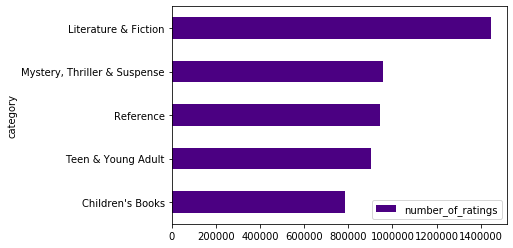

In [17]:
#categories with most reviews
most_review = df_.groupby('category')['number_of_ratings'].sum().to_frame().reset_index().sort_values('number_of_ratings', ascending = False).iloc[:5]
most_review.sort_values('number_of_ratings').plot.barh(x = 'category', color = 'indigo')

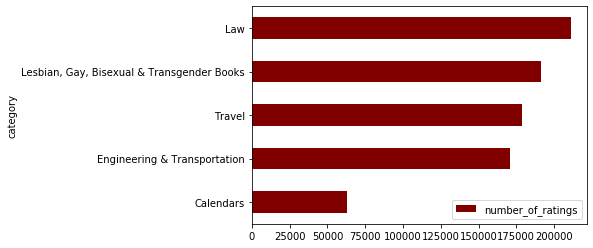

In [18]:
#categories with least reviews
least_review = df_.groupby('category')['number_of_ratings'].sum().to_frame().reset_index().sort_values('number_of_ratings').iloc[:5]
least_review.sort_values('number_of_ratings').plot.barh(x = 'category', color = 'maroon')

In [19]:
#ranking book categories based on rating
df_.groupby('category')['rating'].mean().to_frame().reset_index().sort_values('rating', ascending = False).reset_index(drop = True)

,category,rating
0,Children's Books,4.791304
1,Calendars,4.738462
2,Humor & Entertainment,4.714286
3,Education & Teaching,4.695745
4,Religion & Spirituality,4.693182
5,Christian Books & Bibles,4.684444
6,Parenting & Relationships,4.684444
7,Computers & Technology,4.680000
8,Biographies & Memoirs,4.672093
9,Reference,4.669565
